In [1]:
import yfinance as yf
import talib
import matplotlib.pyplot as plt
import plotly
import numpy as np
from itertools import compress
import matplotlib.dates as mdates
import pandas as pd

from plotly.offline import plot
import plotly.graph_objs as go

from matplotlib.pylab import date2num
from mplfinance.original_flavor import candlestick_ohlc

import trendln

import matplotlib.ticker as ticker

import datetime

import matplotlib.dates as mpl_dates

import json

In [4]:
candle_rankings = {
        "CDL3LINESTRIKE_Bull": 1,
        "CDL3LINESTRIKE_Bear": 2,
        "CDL3BLACKCROWS_Bull": 3,
        "CDL3BLACKCROWS_Bear": 3,
        "CDLEVENINGSTAR_Bull": 4,
        "CDLEVENINGSTAR_Bear": 4,
        "CDLTASUKIGAP_Bull": 5,
        "CDLTASUKIGAP_Bear": 5,
        "CDLINVERTEDHAMMER_Bull": 6,
        "CDLINVERTEDHAMMER_Bear": 6,
        "CDLMATCHINGLOW_Bull": 7,
        "CDLMATCHINGLOW_Bear": 7,
        "CDLABANDONEDBABY_Bull": 8,
        "CDLABANDONEDBABY_Bear": 8,
        "CDLBREAKAWAY_Bull": 10,
        "CDLBREAKAWAY_Bear": 10,
        "CDLMORNINGSTAR_Bull": 12,
        "CDLMORNINGSTAR_Bear": 12,
        "CDLPIERCING_Bull": 13,
        "CDLPIERCING_Bear": 13,
        "CDLSTICKSANDWICH_Bull": 14,
        "CDLSTICKSANDWICH_Bear": 14,
        "CDLTHRUSTING_Bull": 15,
        "CDLTHRUSTING_Bear": 15,
        "CDLINNECK_Bull": 17,
        "CDLINNECK_Bear": 17,
        "CDL3INSIDE_Bull": 20,
        "CDL3INSIDE_Bear": 56,
        "CDLHOMINGPIGEON_Bull": 21,
        "CDLHOMINGPIGEON_Bear": 21,
        "CDLDARKCLOUDCOVER_Bull": 22,
        "CDLDARKCLOUDCOVER_Bear": 22,
        "CDLIDENTICAL3CROWS_Bull": 24,
        "CDLIDENTICAL3CROWS_Bear": 24,
        "CDLMORNINGDOJISTAR_Bull": 25,
        "CDLMORNINGDOJISTAR_Bear": 25,
        "CDLXSIDEGAP3METHODS_Bull": 27,
        "CDLXSIDEGAP3METHODS_Bear": 26,
        "CDLTRISTAR_Bull": 28,
        "CDLTRISTAR_Bear": 76,
        "CDLGAPSIDESIDEWHITE_Bull": 46,
        "CDLGAPSIDESIDEWHITE_Bear": 29,
        "CDLEVENINGDOJISTAR_Bull": 30,
        "CDLEVENINGDOJISTAR_Bear": 30,
        "CDL3WHITESOLDIERS_Bull": 32,
        "CDL3WHITESOLDIERS_Bear": 32,
        "CDLONNECK_Bull": 33,
        "CDLONNECK_Bear": 33,
        "CDL3OUTSIDE_Bull": 34,
        "CDL3OUTSIDE_Bear": 39,
        "CDLRICKSHAWMAN_Bull": 35,
        "CDLRICKSHAWMAN_Bear": 35,
        "CDLSEPARATINGLINES_Bull": 36,
        "CDLSEPARATINGLINES_Bear": 40,
        "CDLLONGLEGGEDDOJI_Bull": 37,
        "CDLLONGLEGGEDDOJI_Bear": 37,
        "CDLHARAMI_Bull": 38,
        "CDLHARAMI_Bear": 72,
        "CDLLADDERBOTTOM_Bull": 41,
        "CDLLADDERBOTTOM_Bear": 41,
        "CDLCLOSINGMARUBOZU_Bull": 70,
        "CDLCLOSINGMARUBOZU_Bear": 43,
        "CDLTAKURI_Bull": 47,
        "CDLTAKURI_Bear": 47,
        "CDLDOJISTAR_Bull": 49,
        "CDLDOJISTAR_Bear": 51,
        "CDLHARAMICROSS_Bull": 50,
        "CDLHARAMICROSS_Bear": 80,
        "CDLADVANCEBLOCK_Bull": 54,
        "CDLADVANCEBLOCK_Bear": 54,
        "CDLSHOOTINGSTAR_Bull": 55,
        "CDLSHOOTINGSTAR_Bear": 55,
        "CDLMARUBOZU_Bull": 71,
        "CDLMARUBOZU_Bear": 57,
        "CDLUNIQUE3RIVER_Bull": 60,
        "CDLUNIQUE3RIVER_Bear": 60,
        "CDL2CROWS_Bull": 61,
        "CDL2CROWS_Bear": 61,
        "CDLBELTHOLD_Bull": 62,
        "CDLBELTHOLD_Bear": 63,
        "CDLHAMMER_Bull": 65,
        "CDLHAMMER_Bear": 65,
        "CDLHIGHWAVE_Bull": 67,
        "CDLHIGHWAVE_Bear": 67,
        "CDLSPINNINGTOP_Bull": 69,
        "CDLSPINNINGTOP_Bear": 73,
        "CDLUPSIDEGAP2CROWS_Bull": 74,
        "CDLUPSIDEGAP2CROWS_Bear": 74,
        "CDLGRAVESTONEDOJI_Bull": 77,
        "CDLGRAVESTONEDOJI_Bear": 77,
        "CDLHIKKAKEMOD_Bull": 82,
        "CDLHIKKAKEMOD_Bear": 81,
        "CDLHIKKAKE_Bull": 85,
        "CDLHIKKAKE_Bear": 83,
        "CDLENGULFING_Bull": 84,
        "CDLENGULFING_Bear": 91,
        "CDLMATHOLD_Bull": 86,
        "CDLMATHOLD_Bear": 86,
        "CDLHANGINGMAN_Bull": 87,
        "CDLHANGINGMAN_Bear": 87,
        "CDLRISEFALL3METHODS_Bull": 94,
        "CDLRISEFALL3METHODS_Bear": 89,
        "CDLKICKING_Bull": 96,
        "CDLKICKING_Bear": 102,
        "CDLDRAGONFLYDOJI_Bull": 98,
        "CDLDRAGONFLYDOJI_Bear": 98,
        "CDLCONCEALBABYSWALL_Bull": 101,
        "CDLCONCEALBABYSWALL_Bear": 101,
        "CDL3STARSINSOUTH_Bull": 103,
        "CDL3STARSINSOUTH_Bear": 103,
        "CDLDOJI_Bull": 104,
        "CDLDOJI_Bear": 104
    }

In [5]:
candle_names = talib.get_function_groups()['Pattern Recognition']

exclude_items = ('CDLCOUNTERATTACK',
                 'CDLLONGLINE',
                 'CDLSHORTLINE',
                 'CDLSTALLEDPATTERN',
                 'CDLKICKINGBYLENGTH')
candle_names = [candle for candle in candle_names if candle not in exclude_items]

In [2]:
def get_stock_info_by_ticker(ticker: str = "") -> dict:
    return  yf.Ticker(ticker).info

In [7]:
def get_stock_price_for_period_by_ticker(ticker: str = "MSFT", 
                                      start: str = "2020-07-01", 
                                      end: str = "2020-08-06", 
                                      interval: str ="1d"):
    sprice_df = yf.download(ticker, start=start, end=end, interval=interval)
    
    sprice_df['Change'] = sprice_df['Close'] - sprice_df['Open']
    sprice_df['Change pct'] = sprice_df['Change'] / sprice_df['Open']
    sprice_df['Shadow range'] = sprice_df['High'] - sprice_df['Low']
    
    return sprice_df

In [151]:
def match_candlestick_patterns(sprice_df):
    op = sprice_df['Open']
    hi = sprice_df['High']
    lo = sprice_df['Low']
    cl = sprice_df['Close']
    
    for candle in candle_names:
        # below is same as;
        # df["CDL3LINESTRIKE"] = talib.CDL3LINESTRIKE(op, hi, lo, cl)
        sprice_df[candle] = getattr(talib, candle)(op, hi, lo, cl)
    
    
    sprice_df['candlestick_pattern'] = np.nan
    sprice_df['candlestick_match_count'] = np.nan
    
    for index, row in sprice_df.iterrows():
    
        # no pattern found
        if len(row[candle_names]) - sum(row[candle_names] == 0) == 0:
            sprice_df.loc[index,'candlestick_pattern'] = "NO_PATTERN"
            sprice_df.loc[index, 'candlestick_match_count'] = 0
        # single pattern found
        elif len(row[candle_names]) - sum(row[candle_names] == 0) == 1:
            # bull pattern 100 or 200
            if any(row[candle_names].values > 0):
                pattern = list(compress(row[candle_names].keys(), row[candle_names].values != 0))[0] + '_Bull'
                sprice_df.loc[index, 'candlestick_pattern'] = pattern
                sprice_df.loc[index, 'candlestick_match_count'] = 1
            # bear pattern -100 or -200
            else:
                pattern = list(compress(row[candle_names].keys(), row[candle_names].values != 0))[0] + '_Bear'
                sprice_df.loc[index, 'candlestick_pattern'] = pattern
                sprice_df.loc[index, 'candlestick_match_count'] = 1
        # multiple patterns matched -- select best performance
        else:
            # filter out pattern names from bool list of values
            patterns = list(compress(row[candle_names].keys(), row[candle_names].values != 0))
            container = []
            for pattern in patterns:
                if row[pattern] > 0:
                    container.append(pattern + '_Bull')
                else:
                    container.append(pattern + '_Bear')
            rank_list = [candle_rankings[p] for p in container]
            if len(rank_list) == len(container):
                rank_index_best = rank_list.index(min(rank_list))
                sprice_df.loc[index, 'candlestick_pattern'] = container[rank_index_best]
                sprice_df.loc[index, 'candlestick_match_count'] = len(container)
    
    # clean up candle columns
    sprice_df.drop(candle_names, axis = 1, inplace = True)

In [280]:
def plot_candles_and_trendlines(history):
    fromwindows = True
    numbest = 2
    pctbound=0.1
    xformatter = ticker.FuncFormatter(trendln.datefmt(history.index))
    
    hist = (history.Low, history.High)
    
    plt.clf()
    fig = plt.figure()
    fig.set_size_inches((24, 20))
    
    ax_candle = fig.add_axes((0, 0, 1, 1))
    
    ax_candle.xaxis_date()

# Get nested list of date, open, high, low and close prices
    ohlc = []
    delta = date2num(history.index[0])
    
    for date, row in history.iterrows():
        openp, highp, lowp, closep = row[:4]
        #print(date)
        ohlc.append([date2num(date)-delta, openp, highp, lowp, closep])
    
    for i in range(len(ohlc)):
        ohlc[i][0] = i
    
    # Plot candlestick chart
    candlestick_ohlc(ax_candle, ohlc, colorup="g", colordown="r", width=0.8)
    #ax_candle.legend()
    
    ret = trendln.calc_support_resistance(hist, accuracy=2)

    #plt.subplot(111)
    
    if len(ret) == 2:
        minimaIdxs, pmin, mintrend, minwindows = ret[0]
        maximaIdxs, pmax, maxtrend, maxwindows = ret[1]
        
        if type(hist) is tuple and len(hist) == 2 and trendln.check_num_alike(hist[0]) and trendln.check_num_alike(hist[1]):
            len_h = len(hist[0])
            min_h, max_h = min(min(hist[0]), min(hist[1])), max(max(hist[0]), max(hist[1]))
            disp = [(hist[0], minimaIdxs, pmin, 'yo', 'Avg. Support', 'y--'), (hist[1], maximaIdxs, pmax, 'bo', 'Avg. Resistance', 'b--')]
            dispwin = [(hist[0], minwindows, 'Support', 'g--'), (hist[1], maxwindows, 'Resistance', 'r--')]
            disptrend = [(hist[0], mintrend, 'Support', 'g--'), (hist[1], maxtrend, 'Resistance', 'r--')]
        
        else:
            len_h = len(hist)
            min_h, max_h = min(hist), max(hist)
            disp = [(hist, minimaIdxs, pmin, 'yo', 'Avg. Support', 'y--'), (hist, maximaIdxs, pmax, 'bo', 'Avg. Resistance', 'b--')]
            dispwin = [(hist, minwindows, 'Support', 'g--'), (hist, maxwindows, 'Resistance', 'r--')]
            disptrend = [(hist, mintrend, 'Support', 'g--'), (hist, maxtrend, 'Resistance', 'r--')]
   
    else:
        minimaIdxs, pmin, mintrend, minwindows = ([], [], [], []) if hist[0] is None else ret
        maximaIdxs, pmax, maxtrend, maxwindows = ([], [], [], []) if hist[1] is None else ret
        len_h = len(hist[1 if hist[0] is None else 0])
        min_h, max_h = min(hist[1 if hist[0] is None else 0]), max(hist[1 if hist[0] is None else 0])
        disp = [(hist[1], maximaIdxs, pmax, 'bo', 'Avg. Resistance', 'b--') if hist[0] is None else (hist[0], minimaIdxs, pmin, 'yo', 'Avg. Support', 'y--')]
        dispwin = [(hist[1], maxwindows, 'Resistance', 'r--') if hist[0] is None else (hist[0], minwindows, 'Support', 'g--')]
        disptrend = [(hist[1], maxtrend, 'Resistance', 'r--') if hist[0] is None else (hist[0], mintrend, 'Support', 'g--')]
    
    print(len_h)
    
    for h, idxs, pm, clrp, lbl, clrl in disp:
        # print(idxs)
        # print( [h[x] for x in idxs])
        ax_candle.plot(idxs, [h[x] for x in idxs], clrp)
        ax_candle.plot([0, len_h-1],[pm[1],pm[0] * (len_h-1) + pm[1]],clrl, label=lbl)
    
    def add_trend(h, trend, lbl, clr, bFirst):
        for ln in trend[:numbest]:
            maxx = ln[0][-1]+1
            
            while maxx < len_h:
                ypred = ln[1][0] * maxx + ln[1][1]
                
                if (h[maxx] > ypred and h[maxx-1] < ypred or h[maxx] < ypred and h[maxx-1] > ypred or
                    ypred > max_h + (max_h-min_h)*pctbound or ypred < min_h - (max_h-min_h)*pctbound): break
                maxx += 1
                
            x_vals = np.array((ln[0][0], maxx)) # plt.gca().get_xlim())
            y_vals = ln[1][0] * x_vals + ln[1][1]
            
            if bFirst:
                ax_candle.plot([ln[0][0], maxx], y_vals, clr, label=lbl)
                bFirst = False
                
            else: ax_candle.plot([ln[0][0], maxx], y_vals, clr)
                
        return bFirst
    
    if fromwindows:
        for h, windows, lbl, clr in dispwin:
            bFirst = True
            
            for trend in windows:
                bFirst = add_trend(h, trend, lbl, clr, bFirst)
    else:
        for h, trend, lbl, clr in disptrend:
            add_trend(h, trend, lbl, clr, True)
            
    
    plt.title('Prices with Support/Resistance Trend Lines')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(6))
    #plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    
    if not xformatter is None: plt.gca().xaxis.set_major_formatter(xformatter)
    plt.setp(plt.gca().get_xticklabels(), rotation=30, ha='right')
    
    #xdate = [datetime.datetime.fromtimestamp(i) for i in history.index]

    ax_candle.xaxis.set_major_locator(ticker.MaxNLocator(6))
    ax_candle.xaxis.set_major_formatter(xformatter)

    def mydate(x,pos):
        try:
            return xdate[int(x)]
        except IndexError:
            return ''

    #ax_candle.xaxis.set_major_formatter(ticker.FuncFormatter(mydate))
    #plt.gca().set_position([0, 0, 1, 1])
    #plt.savefig(os.path.join(curdir, 'data', 'suppres.svg'), format='svg', bbox_inches = 'tight')
    #plt.show()
    fig.autofmt_xdate()
    return plt.gcf()

In [152]:
clf_price = get_stock_price_for_period_by_ticker('CLF', start = "2021-02-15", 
                                      end = "2021-08-13", 
                                      interval = "1d")
clf_price

[*********************100%***********************]  1 of 1 completed


Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2021-02-16  16.940001  16.969999  16.400000  16.860001  16.860001  12201300   
2021-02-17  16.809999  17.660000  16.580000  17.430000  17.430000  14521400   
2021-02-18  17.250000  17.580000  16.590000  16.600000  16.600000  13298900   
2021-02-19  16.870001  17.320000  16.719999  17.020000  17.020000  18913300   
2021-02-22  16.910000  17.959999  16.680000  17.389999  17.389999  24411700   
...               ...        ...        ...        ...        ...       ...   
2021-08-06  23.760000  24.120001  23.389999  24.020000  24.020000  20235100   
2021-08-09  23.799999  24.840000  23.500000  24.770000  24.770000  21852200   
2021-08-10  24.799999  26.370001  24.750000  26.020000  26.020000  36532700   
2021-08-11  26.180000  26.450001  25.120001  25.750000  25.750000  29809600   
2021-08-12  25.520000  25.920000  24.730000  25.719999  25.719999  21813300   

              Change  Change pct  Shadow range  
Date                                            
2021-02-16 -0.080000   -0.004723      0.570000  
2021-02-17  0.620001    0.036883      1.080000  
2021-02-18 -0.650000   -0.037681      0.990000  
2021-02-19  0.150000    0.008892      0.600000  
2021-02-22  0.480000    0.028386      1.279999  
...              ...         ...           ...  
2021-08-06  0.260000    0.010943      0.730001  
2021-08-09  0.970001    0.040756      1.340000  
2021-08-10  1.220001    0.049194      1.620001  
2021-08-11 -0.430000   -0.016425      1.330000  
2021-08-12  0.199999    0.007837      1.190001  

[125 rows x 9 columns]

In [153]:
match_candlestick_patterns(clf_price)

In [154]:
clf_price[60:90]

Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2021-05-12  21.379999  21.920000  19.700001  19.969999  19.969999  33842500   
2021-05-13  19.980000  20.950001  19.150000  19.799999  19.799999  25267100   
2021-05-14  19.510000  20.110001  18.959999  19.510000  19.510000  28813000   
2021-05-17  19.900000  20.969999  19.559999  20.889999  20.889999  27046000   
2021-05-18  20.760000  21.049999  20.170000  20.240000  20.240000  16239300   
2021-05-19  19.459999  19.690001  18.620001  19.030001  19.030001  27723600   
2021-05-20  19.059999  19.170000  18.260000  18.420000  18.420000  26485600   
2021-05-21  18.600000  19.070000  17.910000  18.059999  18.059999  27813200   
2021-05-24  18.049999  18.610001  17.650000  18.559999  18.559999  20008900   
2021-05-25  18.680000  19.020000  18.080000  18.200001  18.200001  18500800   
2021-05-26  18.200001  19.010000  18.150000  18.920000  18.920000  15203700   
2021-05-27  19.450001  20.450001  19.320000  20.200001  20.200001  28116900   
2021-05-28  20.000000  20.299999  19.580000  20.120001  20.120001  15044300   
2021-06-01  20.570000  20.690001  20.129999  20.490000  20.490000  13460300   
2021-06-02  20.440001  20.490000  19.790001  20.120001  20.120001  13546500   
2021-06-03  19.709999  20.280001  19.230000  20.000000  20.000000  14873700   
2021-06-04  20.230000  20.370001  19.840000  19.870001  19.870001  13020000   
2021-06-07  19.719999  19.920000  19.230000  19.370001  19.370001  13653500   
2021-06-08  19.440001  20.350000  18.950001  20.270000  20.270000  18652500   
2021-06-09  20.549999  23.990000  20.389999  23.219999  23.219999  89032100   
2021-06-10  23.530001  24.770000  22.650000  22.959999  22.959999  74018100   
2021-06-11  23.570000  24.570000  23.299999  24.440001  24.440001  57780400   
2021-06-14  24.010000  24.070000  21.959999  22.139999  22.139999  41312600   
2021-06-15  22.610001  23.340000  21.360001  22.860001  22.860001  54691400   
2021-06-16  22.600000  23.250000  21.860001  22.660000  22.660000  43429100   
2021-06-17  22.330000  22.610001  20.680000  21.190001  21.190001  49202000   
2021-06-18  21.250000  21.719999  19.910000  20.270000  20.270000  44803400   
2021-06-21  20.430000  21.139999  20.350000  20.870001  20.870001  29789300   
2021-06-22  20.820000  21.120001  20.469999  20.870001  20.870001  18544900   
2021-06-23  21.340000  21.940001  20.969999  21.139999  21.139999  22823200   

              Change  Change pct  Shadow range      candlestick_pattern  \
Date                                                                      
2021-05-12 -1.410000   -0.065949      2.219999               NO_PATTERN   
2021-05-13 -0.180000   -0.009009      1.800001         CDLHIGHWAVE_Bear   
2021-05-14  0.000000    0.000000      1.150002      CDLRICKSHAWMAN_Bull   
2021-05-17  0.990000    0.049749      1.410000  CDLCLOSINGMARUBOZU_Bull   
2021-05-18 -0.520000   -0.025048      0.879999           CDLHARAMI_Bear   
2021-05-19 -0.429998   -0.022097      1.070000          CDL3INSIDE_Bear   
2021-05-20 -0.639999   -0.033578      0.910000               NO_PATTERN   
2021-05-21 -0.540001   -0.029032      1.160000               NO_PATTERN   
2021-05-24  0.510000    0.028255      0.960001               NO_PATTERN   
2021-05-25 -0.480000   -0.025696      0.940001               NO_PATTERN   
2021-05-26  0.719999    0.039560      0.860001         CDLBELTHOLD_Bull   
2021-05-27  0.750000    0.038560      1.130001          CDLHIKKAKE_Bear   
2021-05-28  0.120001    0.006000      0.719999      CDLSPINNINGTOP_Bull   
2021-06-01 -0.080000   -0.003889      0.560001      CDLRICKSHAWMAN_Bull   
2021-06-02 -0.320000   -0.015656      0.699999           CDLHAMMER_Bull   
2021-06-03  0.290001    0.014713      1.050001               NO_PATTERN   
2021-06-04 -0.359999   -0.017795      0.530001               NO_PATTERN   
2021-06-07 -0.349998   -0.017748      0.690001               NO

<AxesSubplot:xlabel='Date'>

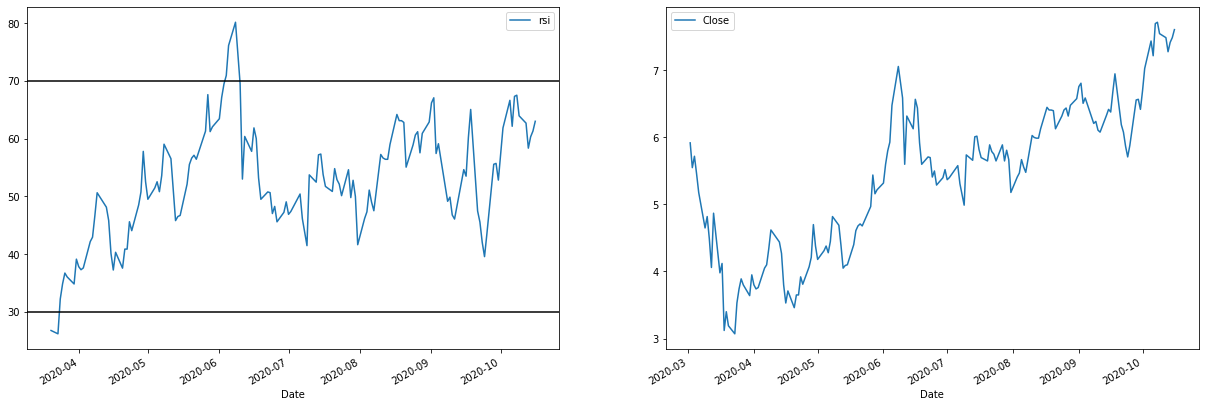

In [158]:
tsla_df.loc[:, 'ma20'] = tsla_df.Close.rolling(20).mean()
tsla_df.loc[:, 'ma200'] = tsla_df.Close.rolling(200).mean()


tsla_df.loc[:, "rsi"] = talib.RSI(tsla_df.Close, 14)

fig, ax = plt.subplots(1, 2, figsize=(21, 7))
ax0 = tsla_df[["rsi"]].plot(ax=ax[0])
ax0.axhline(30, color="black")
ax0.axhline(70, color="black")
tsla_df[["Close"]].plot(ax=ax[1])

In [159]:
import plotly.graph_objects as go
fig = go.Figure(
    data=go.Ohlc(
        x=tsla_df.index,
        open=tsla_df["Open"],
        high=tsla_df["High"],
        low=tsla_df["Low"],
        close=tsla_df["Close"],
    )
)
fig.show()

In [160]:
  # TA PATTERNS PART 

In [161]:
candle_names = talib.get_function_groups()['Pattern Recognition']

In [169]:
from plotly.offline import plot
import plotly.graph_objs as go
import pandas as pd

o = pins_df['Open'].astype(float)
h = pins_df['High'].astype(float)
l = pins_df['Low'].astype(float)
c = pins_df['Close'].astype(float)

trace = go.Candlestick(
            open=o,
            high=h,
            low=l,
            close=c)
data = [trace]

plot(data, filename='go_candle1.html')

'go_candle1.html'

In [170]:
pins_df["macd"], pins_df["macd_signal"], pins_df["macd_hist"] = talib.MACD(pins_df['Close'])
    
# Get MA10 and MA30
pins_df["ma10"] = talib.MA(pins_df["Close"], timeperiod=10)
pins_df["ma30"] = talib.MA(pins_df["Close"], timeperiod=30)

# Get RSI
pins_df["rsi"] = talib.RSI(pins_df["Close"])


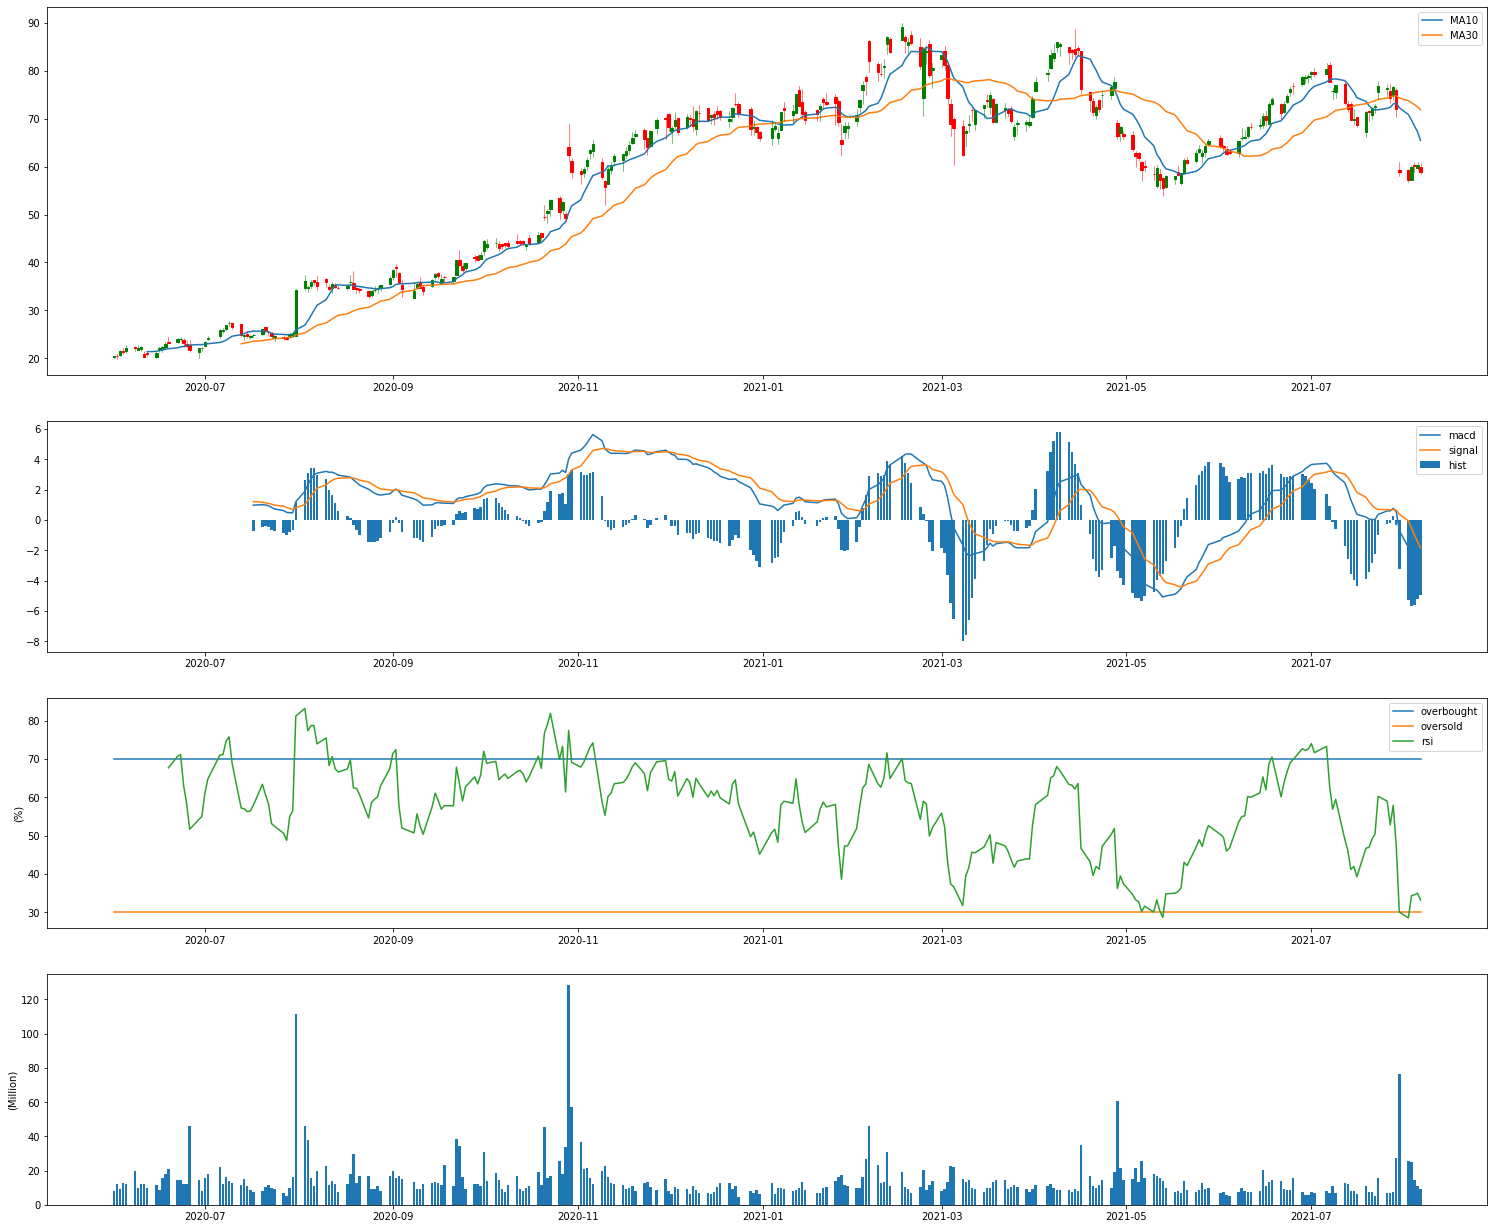

In [171]:



# Create figure and set axes for subplots
fig = plt.figure()
fig.set_size_inches((20, 16))
ax_candle = fig.add_axes((0, 0.72, 1, 0.32))
ax_macd = fig.add_axes((0, 0.48, 1, 0.2), sharex=ax_candle)
ax_rsi = fig.add_axes((0, 0.24, 1, 0.2), sharex=ax_candle)
ax_vol = fig.add_axes((0, 0, 1, 0.2), sharex=ax_candle)

# Format x-axis ticks as dates
ax_candle.xaxis_date()

# Get nested list of date, open, high, low and close prices
ohlc = []
for date, row in pins_df.iterrows():
    openp, highp, lowp, closep = row[:4]
    ohlc.append([date2num(date), openp, highp, lowp, closep])

# Plot candlestick chart
ax_candle.plot(pins_df.index, pins_df["ma10"], label="MA10")
ax_candle.plot(pins_df.index, pins_df["ma30"], label="MA30")
candlestick_ohlc(ax_candle, ohlc, colorup="g", colordown="r", width=0.8)
ax_candle.legend()

# Plot MACD
ax_macd.plot(pins_df.index, pins_df["macd"], label="macd")
ax_macd.bar(pins_df.index, pins_df["macd_hist"] * 3, label="hist")
ax_macd.plot(pins_df.index, pins_df["macd_signal"], label="signal")
ax_macd.legend()

# Plot RSI
# Above 70% = overbought, below 30% = oversold
ax_rsi.set_ylabel("(%)")
ax_rsi.plot(pins_df.index, [70] * len(pins_df.index), label="overbought")
ax_rsi.plot(pins_df.index, [30] * len(pins_df.index), label="oversold")
ax_rsi.plot(pins_df.index, pins_df["rsi"], label="rsi")
ax_rsi.legend()

# Show volume in millions
ax_vol.bar(pins_df.index, pins_df["Volume"] / 1000000)
ax_vol.set_ylabel("(Million)")

# Save the chart as PNG
#fig.savefig("charts/" + 'PINS' + ".png", bbox_inches="tight")

plt.show()

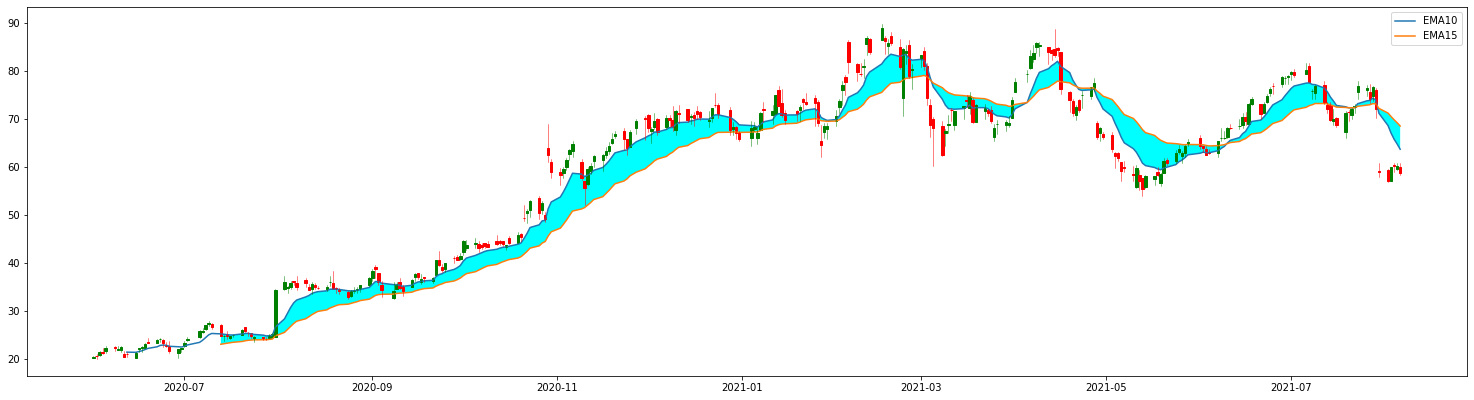

In [174]:
pins_df["ema10"] = talib.EMA(pins_df["Close"], timeperiod=10)
pins_df["ema15"] = talib.EMA(pins_df["Close"], timeperiod=30)

fig = plt.figure()
fig.set_size_inches((20, 16))
ax_candle = fig.add_axes((0, 0.72, 1, 0.32))


# Format x-axis ticks as dates
ax_candle.xaxis_date()

# Get nested list of date, open, high, low and close prices
ohlc = []
for date, row in pins_df.iterrows():
    openp, highp, lowp, closep = row[:4]
    ohlc.append([date2num(date), openp, highp, lowp, closep])

# Plot candlestick chart
ax_candle.plot(pins_df.index, pins_df["ema10"], label="EMA10")
ax_candle.plot(pins_df.index, pins_df["ema15"], label="EMA15")
candlestick_ohlc(ax_candle, ohlc, colorup="g", colordown="r", width=0.8)

ax_candle.fill_between(pins_df.index,  pins_df["ema10"], pins_df["ema15"], facecolor='cyan')

ax_candle.legend()

In [82]:
from yahoo_fin import stock_info as si
# get live price of Apple
si.get_live_price("aapl")
 

149.10000610351562

In [1]:
clf_price = get_stock_price_for_period_by_ticker('CLF', start = "2021-02-15", 
                                      end = "2021-08-13", 
                                      interval = "1d")

NameError: name 'get_stock_price_for_period_by_ticker' is not defined

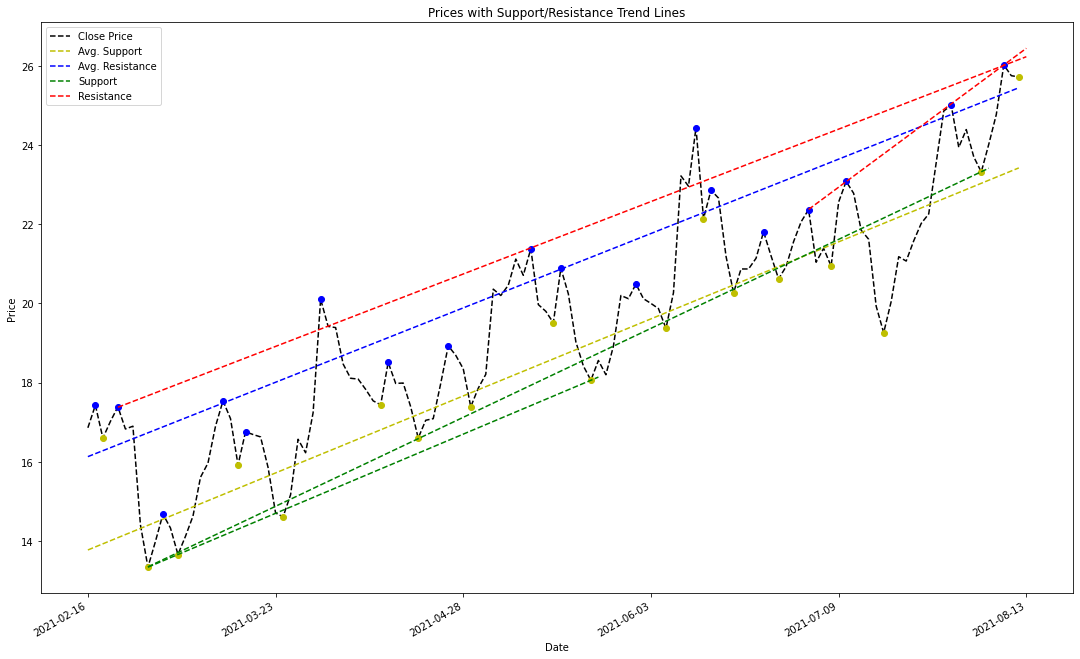

In [22]:
fig = trendln.plot_sup_res_date(clf_price[-1000:].Close, clf_price.index, accuracy = 2) #requires pandas

fig.set_size_inches(18.5, 10.5)

plt.savefig('suppres.svg', format='svg')
plt.show()

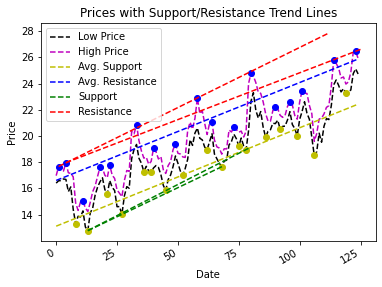

In [17]:
fig = trendln.plot_support_resistance((clf_price[-1000:].Low, clf_price[-1000:].High), accuracy = 2) #requires pandas
plt.savefig('suppres.svg', format='svg')
plt.show()

In [281]:
clf_price = get_stock_price_for_period_by_ticker('CLF', start = "2021-02-15", 
                                      end = "2021-08-13", 
                                      interval = "1d")


[*********************100%***********************]  1 of 1 completed


In [282]:
# TODO CHANGE INDEX TO MATCH PLOT PROPERLY

125


<Figure size 432x288 with 0 Axes>

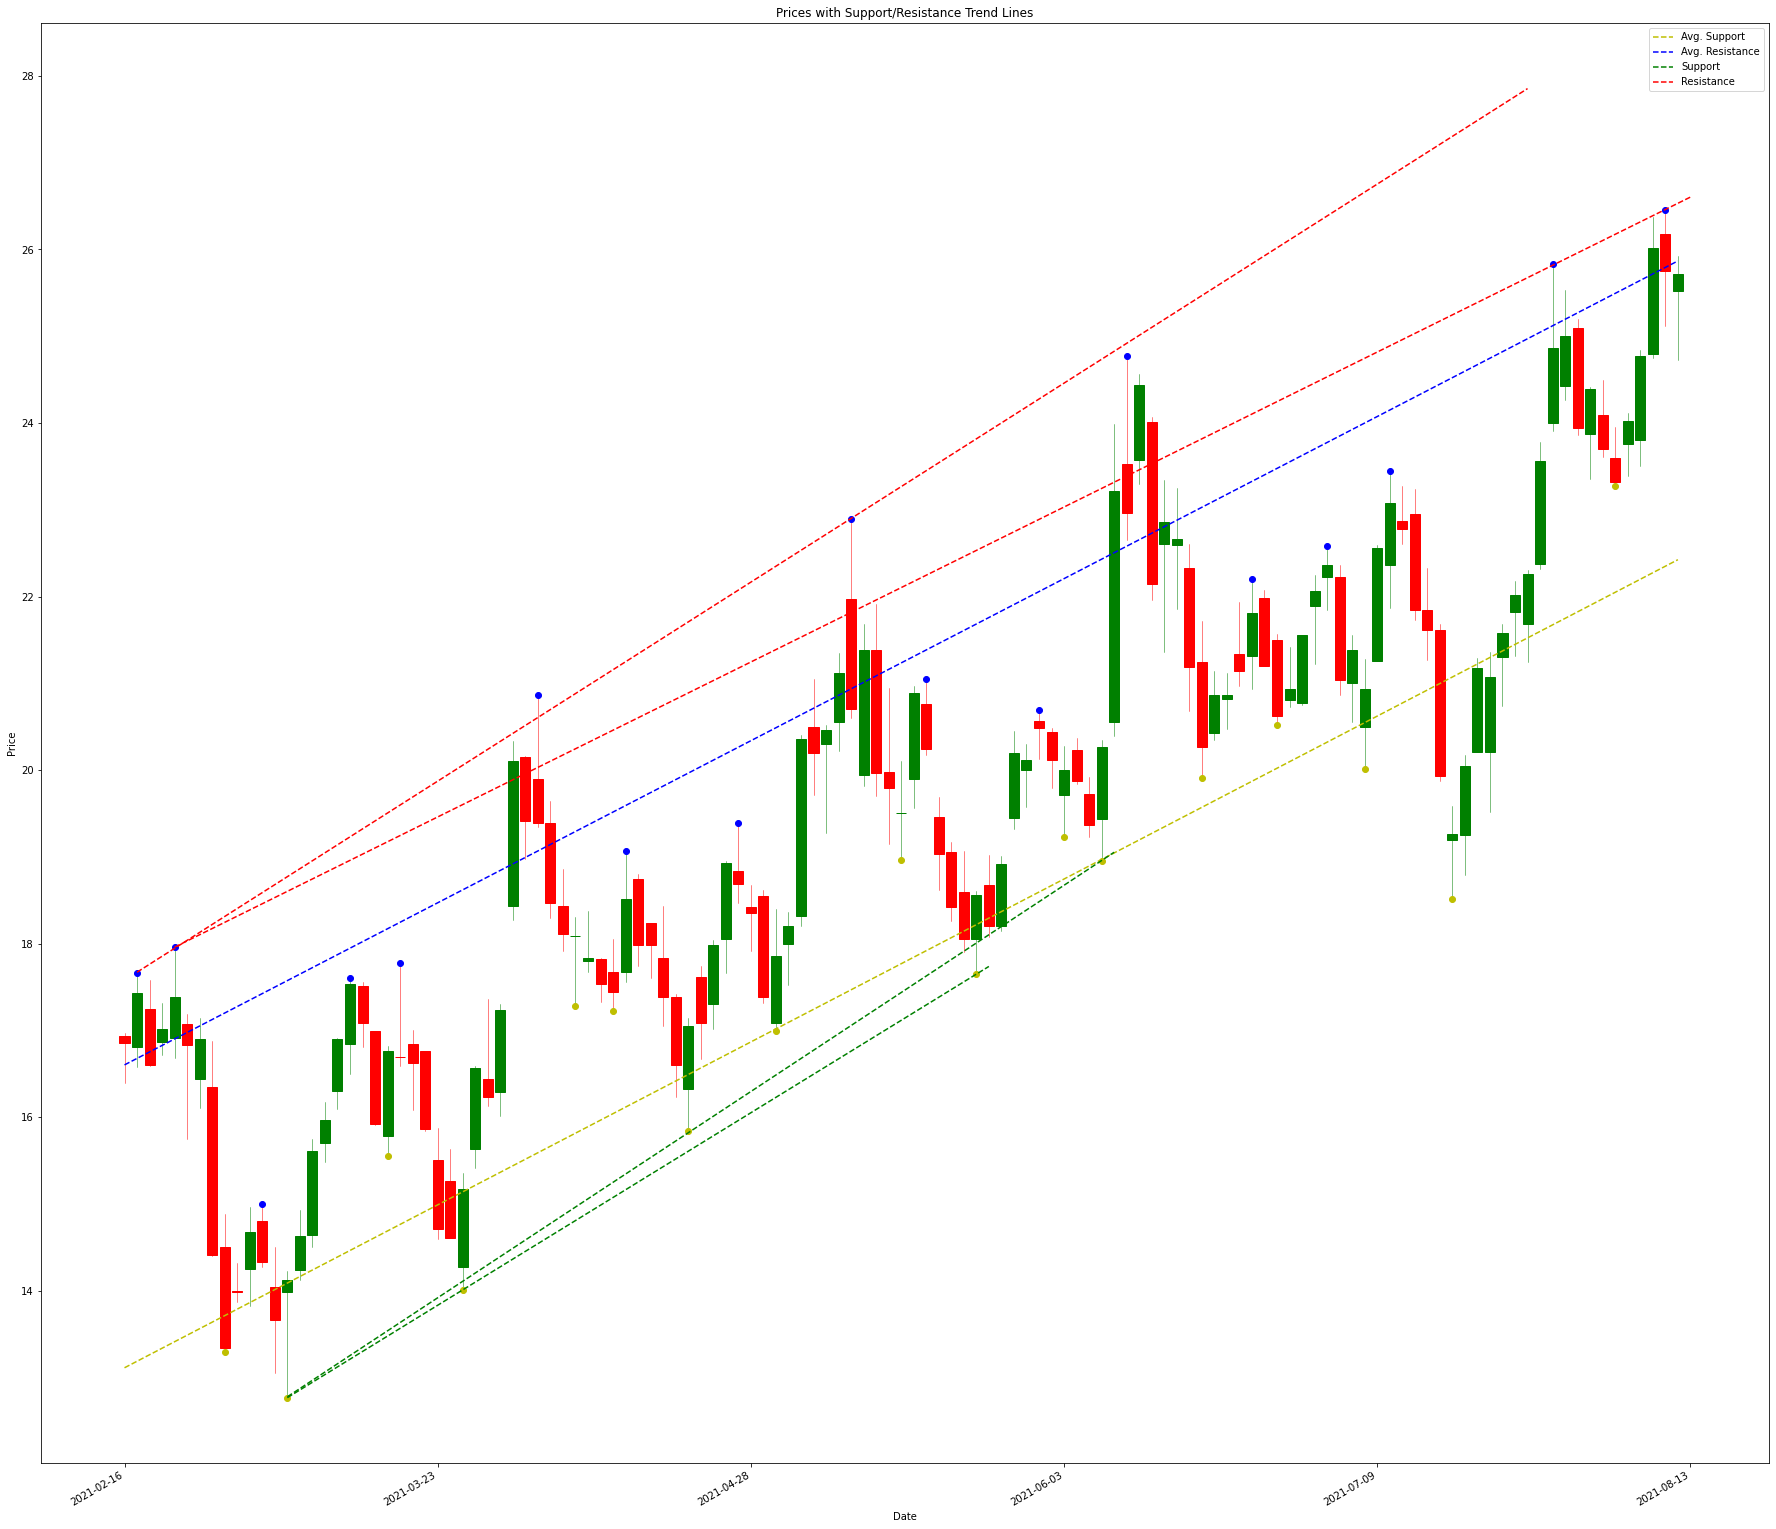

In [283]:
fig_total = plot_candles_and_trendlines(clf_price)

In [232]:
date2num(clf_price.index[0])

18674.0

[*********************100%***********************]  1 of 1 completed
209


<Figure size 432x288 with 0 Axes>

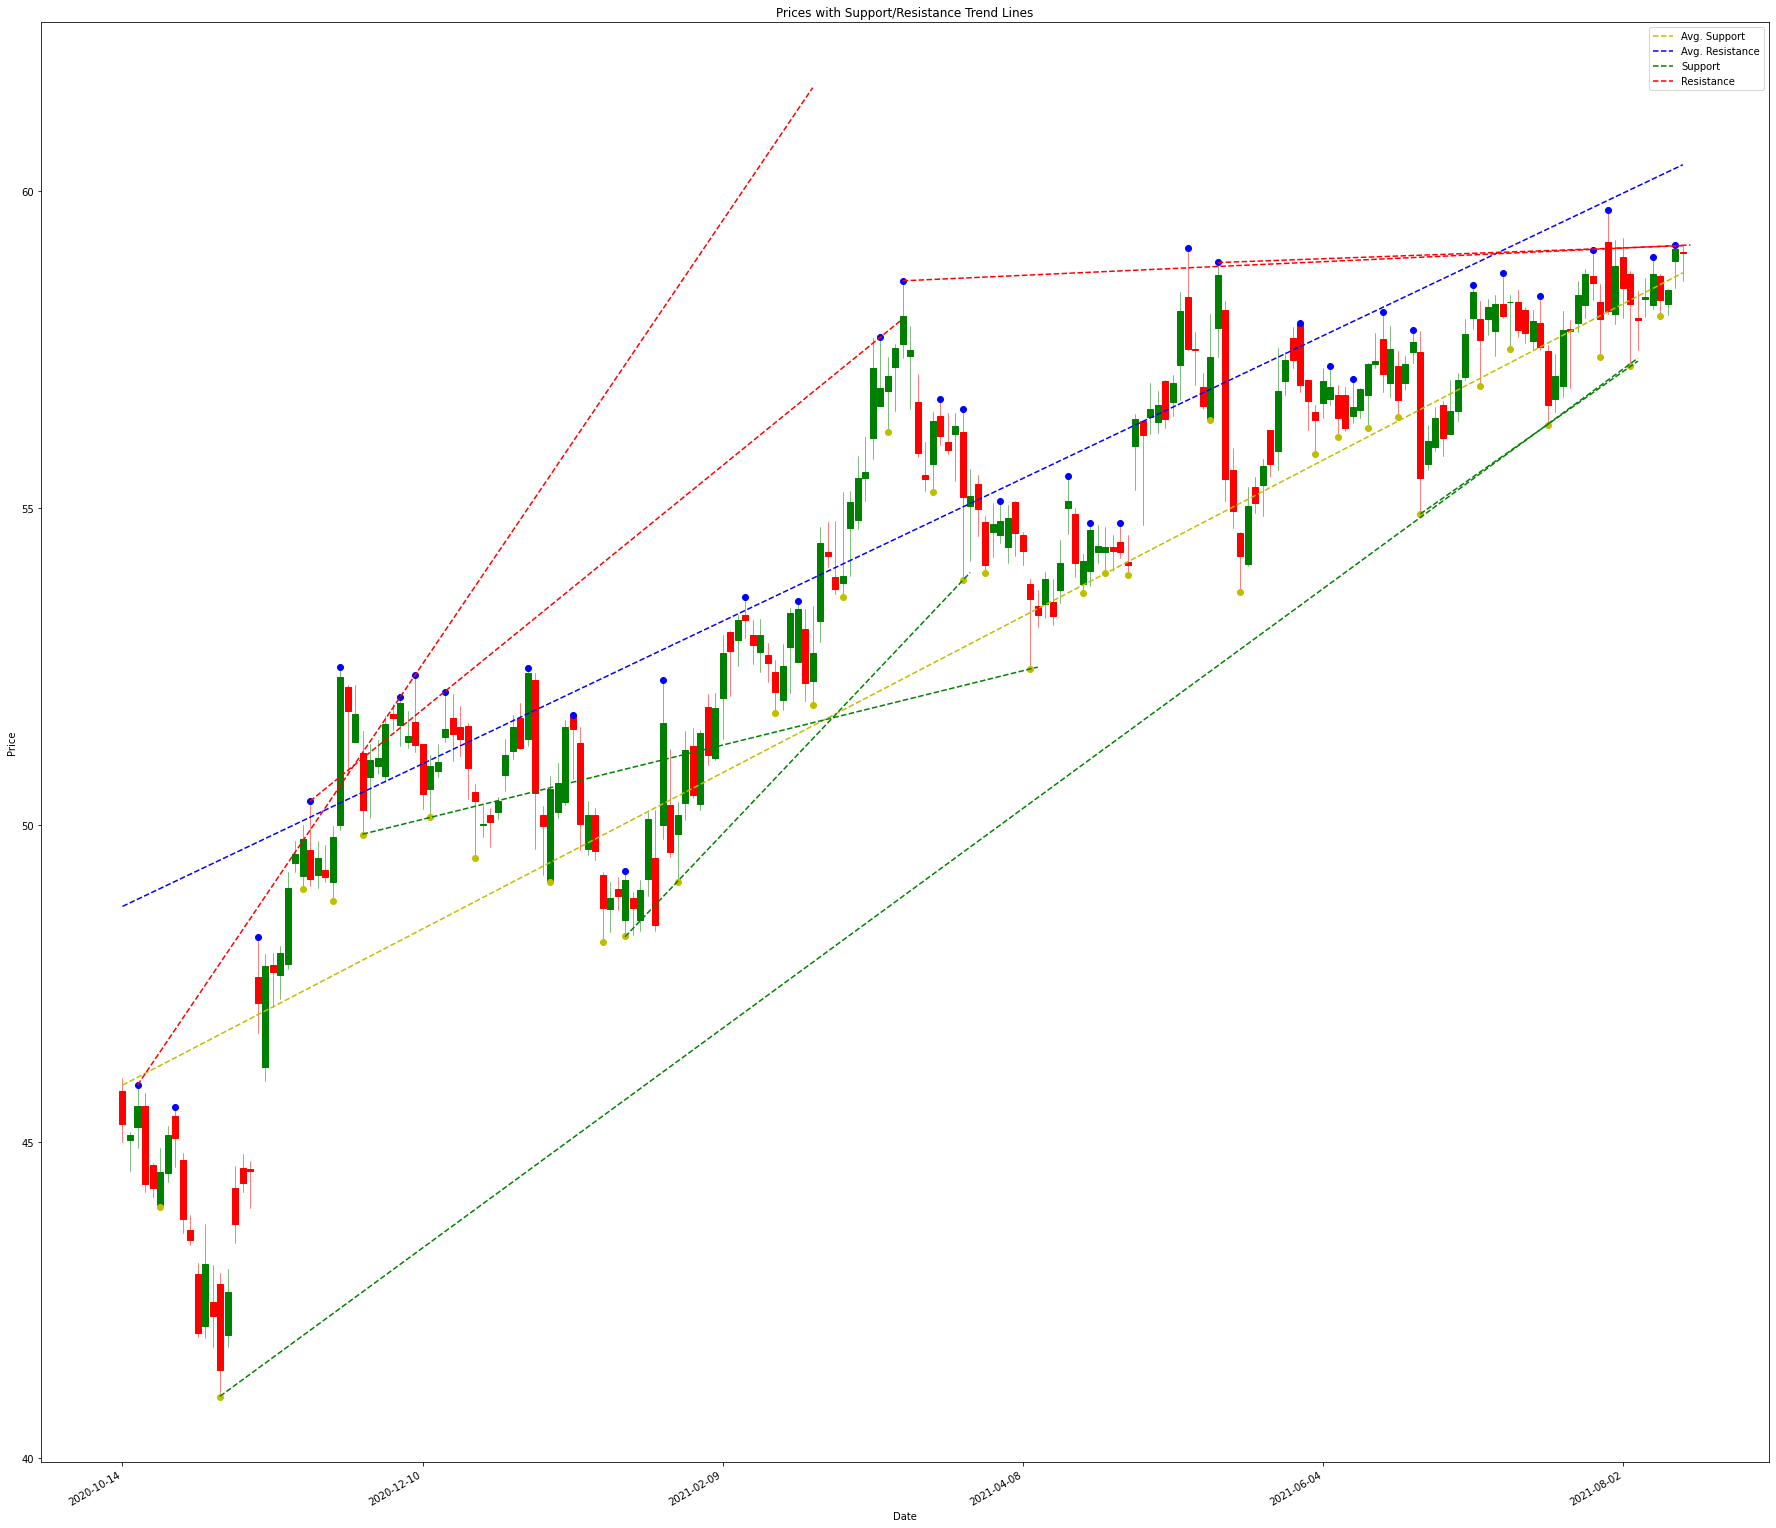

In [287]:
CMCSA_price = get_stock_price_for_period_by_ticker('CMCSA', start = "2020-10-15", 
                                      end = "2021-08-13", 
                                      interval = "1d")

fig_total = plot_candles_and_trendlines(CMCSA_price)

In [5]:
!pip install xlrd

In [35]:
import pandas as pd

file_loc = "fixed_sheet.xlsx"
start_date = "2021-06-18"
end_date = "2021-08-18"


df = pd.ExcelFile(file_loc).parse('18.06.2021') #you could add index_col=0 if there's an index
moex_tickers = df[:100]['Code']
companies_and_prices = {}

In [3]:
start_date = "2021-06-18"
end_date = "2021-08-18"

In [24]:
clf_price = get_stock_price_for_period_by_ticker('CLF', start = "2021-02-15", 
                                      end = "2021-08-13", 
                                      interval = "1d")

clf_close = pd.Series(clf_price['Close'], index=clf_price.index)

[*********************100%***********************]  1 of 1 completed


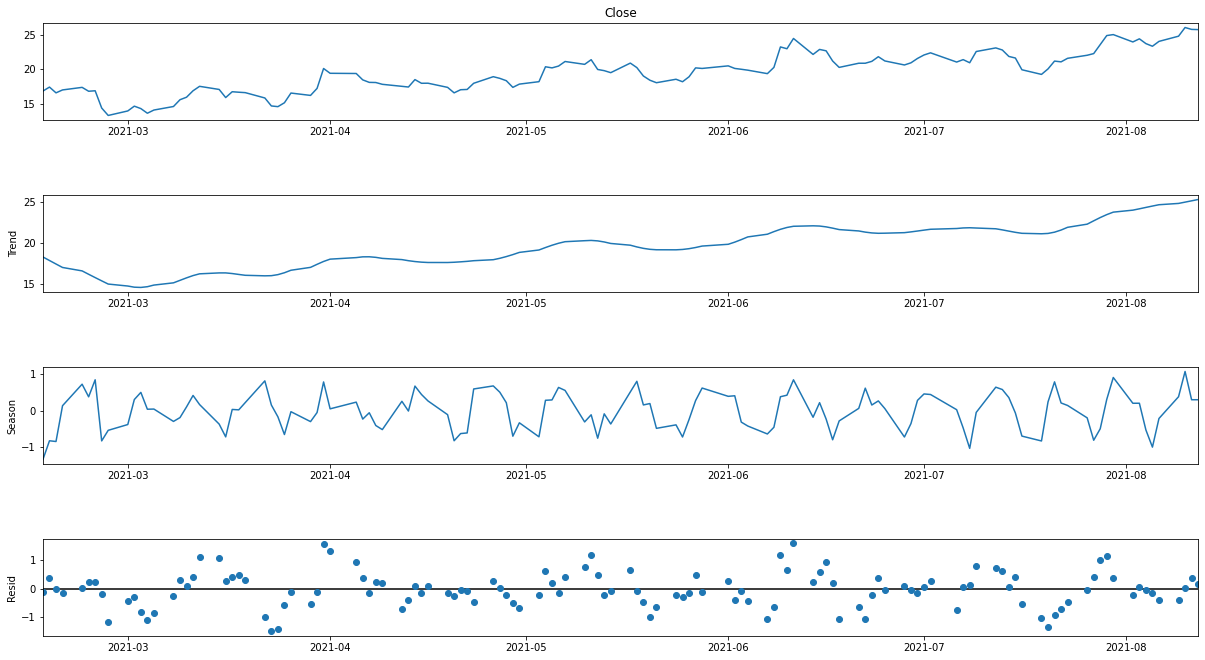

In [42]:
from statsmodels.tsa.seasonal import STL
stl = STL(clf_close, seasonal=5, period=7)
res = stl.fit()
fig = res.plot()
fig.set_size_inches(18.5, 10.5)


In [12]:
type(clf_price['Close'])

pandas.core.series.Series

In [13]:
clf_price

Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2021-02-16  16.940001  16.969999  16.400000  16.860001  16.860001  12201300   
2021-02-17  16.809999  17.660000  16.580000  17.430000  17.430000  14521400   
2021-02-18  17.250000  17.580000  16.590000  16.600000  16.600000  13298900   
2021-02-19  16.870001  17.320000  16.719999  17.020000  17.020000  18913300   
2021-02-22  16.910000  17.959999  16.680000  17.389999  17.389999  24411700   
...               ...        ...        ...        ...        ...       ...   
2021-08-06  23.760000  24.120001  23.389999  24.020000  24.020000  20235100   
2021-08-09  23.799999  24.840000  23.500000  24.770000  24.770000  21852200   
2021-08-10  24.799999  26.370001  24.750000  26.020000  26.020000  36532700   
2021-08-11  26.180000  26.450001  25.120001  25.750000  25.750000  29809600   
2021-08-12  25.520000  25.920000  24.730000  25.719999  25.719999  21813300   

              Change  Change pct  Shadow range  
Date                                            
2021-02-16 -0.080000   -0.004723      0.570000  
2021-02-17  0.620001    0.036883      1.080000  
2021-02-18 -0.650000   -0.037681      0.990000  
2021-02-19  0.150000    0.008892      0.600000  
2021-02-22  0.480000    0.028386      1.279999  
...              ...         ...           ...  
2021-08-06  0.260000    0.010943      0.730001  
2021-08-09  0.970001    0.040756      1.340000  
2021-08-10  1.220001    0.049194      1.620001  
2021-08-11 -0.430000   -0.016425      1.330000  
2021-08-12  0.199999    0.007837      1.190001  

[125 rows x 9 columns]

In [4]:
len(get_stock_info_by_ticker("MSFT"))

151